# Doença Cardiovascular
## Link do dataset: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

### Criação de um modelo de Machine Learning para a predição de problemas cardiovasculares com base em informações contidas no dataset

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
# Removendo a coluna id
df.drop('id', axis=1, inplace=True)

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Descrição das colunas
***age - idade em dias  
gender - sexo feminino (1) e sexo masculino (2)  
height - altura em cm  
weight - peso em kg  
ap_hi - pressão arterial sistólica (máxima)  
ap_lo - pressão arterial distólica (mínima)  
cholesterol - colesterol normal (1), acima do normal (2) e muito acima do normal (3)  
gluc - glicose normal (1), acima do normal (2) e muito acima do normal (3)  
smoke - 0 para não fumante e 1 para fumante  
alco - 0 para pessoas que consomem bebidas alcoólicas e 1 para pessoas que não consomem  
active - 0 para pessoas que não praticam atividades físicas e 1 para pessoas que praticam  
cardio - 0 para pessoas que não tiveram problemas cardíacos e 1 para pessoas que tiveram***

In [5]:
# Informações das colunas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# verificando se há nulos
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Criando uma coluna de idade utilizando ano
df['yr_age'] = df['age']/365
# Converter para inteiro
df['yr_age'] = df['yr_age'].astype('int32')

In [9]:
# Movendo a coluna criada para a primeira posição
yr_age = df['yr_age']
df.drop('yr_age', axis=1, inplace=True)
df.insert(0, 'yr_age', yr_age)
# Apagando a coluna 'age' original
df.drop('age', axis=1,inplace =True)

In [10]:
df.head()

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# Função para ordenar uma coluna para verificação
def ordenar(x):
    df_2 = df.sort_values(x, ascending=True)
    return df_2

In [12]:
ordenar('ap_hi')

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35040,63,2,168,59.0,-150,80,1,1,0,0,1,1
23988,50,1,162,74.0,-140,90,1,1,0,0,1,1
46627,64,2,160,59.0,-120,80,1,1,0,0,0,0
25240,40,2,168,50.0,-120,80,2,1,0,0,0,1
16021,60,2,161,90.0,-115,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47253,54,1,160,65.0,14020,90,1,1,0,0,1,0
25464,43,2,169,75.0,14020,80,2,1,0,0,1,1
25519,58,1,169,71.0,14020,80,3,3,0,0,1,1
46912,46,2,180,78.0,14020,90,1,1,0,0,1,1


In [13]:
ordenar('ap_lo')

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,61,1,167,74.0,15,-70,1,1,0,0,1,1
40330,55,1,162,50.0,309,0,1,1,0,0,1,0
42397,49,2,176,69.0,906,0,1,1,0,0,1,0
56950,41,1,164,70.0,120,0,1,1,0,0,1,0
63787,40,2,161,61.0,117,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43434,60,2,179,62.0,130,9800,1,1,0,0,1,0
68538,52,1,166,70.0,160,10000,2,1,0,0,1,1
23849,49,2,169,86.0,150,10000,2,2,0,1,1,1
2381,57,2,186,105.0,140,10000,1,1,0,0,1,1


In [14]:
ordenar('height')

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22723,64,1,55,81.0,130,90,1,1,0,0,1,1
66643,51,1,57,61.0,130,90,1,1,0,0,1,1
64115,50,1,59,57.6,125,67,1,1,0,0,0,0
29157,52,1,60,69.0,110,70,1,1,0,0,0,0
27603,57,1,64,61.0,130,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40090,58,1,198,99.0,140,80,1,1,0,0,1,1
8897,61,2,198,79.0,160,100,1,1,1,0,0,1
41901,52,2,200,100.0,170,1100,2,2,0,0,1,1
21628,52,2,207,78.0,100,70,1,1,0,1,1,0


In [15]:
ordenar('weight')

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,51,2,165,10.0,180,1100,2,2,0,0,1,1
33817,59,2,178,11.0,130,90,1,1,0,0,1,1
60188,59,1,162,21.0,120,80,2,1,0,0,1,1
29488,55,2,177,22.0,120,80,1,1,1,1,1,0
26806,63,1,157,23.0,110,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61362,45,2,196,180.0,130,80,3,1,0,0,1,1
36780,53,1,161,181.0,180,1100,2,1,0,0,1,1
61285,57,2,180,183.0,110,80,3,3,0,1,1,1
50413,41,2,180,200.0,150,90,1,1,0,0,1,1


<AxesSubplot:xlabel='ap_lo', ylabel='ap_hi'>

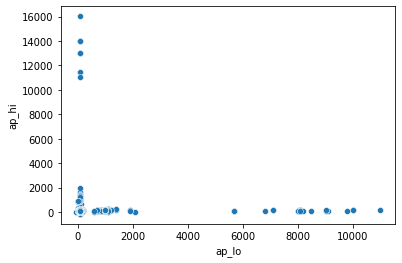

In [16]:
# Gráfico de dispersão entre pressões, para veríficar outliers
sns.scatterplot(x='ap_lo', y='ap_hi', data=df)

<AxesSubplot:xlabel='weight', ylabel='height'>

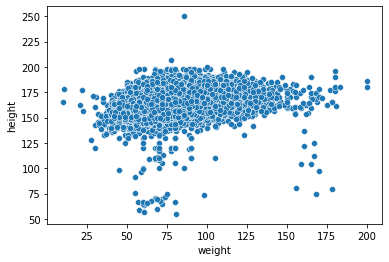

In [17]:
# Gráfico de dispersão entre peso e altura, para veríficar outliers
sns.scatterplot(x='weight', y='height', data=df)

#### Foi verificado que há valores fora do comum em algumas colunas, principalmente na ap_hi e ap_lo, que mostram pressões diastólicas e sistólicas, alturas e pesos.

In [18]:
# excluir as linhas que possuem valores estranhos
df.drop(df[(df['ap_lo'] > 200) | (df['ap_lo'] <= 10) | (df['ap_hi'] > 300) | (df['ap_hi'] < 50) | 
        (df['height'] < 100)| (df['weight'] < 25)].index, inplace=True)

In [19]:
df.describe()

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000
mean,52.828113,1.348719,164.396533,74.122050,126.615028,81.364453,1.364759,1.226042,0.087965,0.053631,0.803406,0.494954
std,6.768665,0.476568,7.986158,14.307757,16.765772,9.730045,0.678981,0.571995,0.283246,0.225290,0.397426,0.499978
min,29.000000,1.000000,100.000000,28.000000,60.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Verificar a correlação entre as colunas
correlacao = df.corr()
correlacao

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
yr_age,1.000000,-0.023367,-0.084131,0.055080,0.208261,0.152013,0.155151,0.098909,-0.047781,-0.029030,-0.010735,0.239352
gender,-0.023367,1.000000,0.511895,0.156354,0.061228,0.066173,-0.036714,-0.021152,0.338773,0.170922,0.005861,0.007324
height,-0.084131,0.511895,1.000000,0.301841,0.018084,0.035125,-0.053228,-0.020386,0.193265,0.096746,-0.008633,-0.011783
weight,0.055080,0.156354,0.301841,1.000000,0.269184,0.248000,0.141112,0.106725,0.066650,0.068467,-0.017880,0.179736
ap_hi,0.208261,0.061228,0.018084,0.269184,1.000000,0.694371,0.193979,0.092504,0.027036,0.032367,-0.001402,0.425000
ap_lo,0.152013,0.066173,0.035125,0.248000,0.694371,1.000000,0.158314,0.076195,0.025050,0.043313,-0.000162,0.332759
cholesterol,0.155151,-0.036714,-0.053228,0.141112,0.193979,0.158314,1.000000,0.451245,0.009949,0.035724,0.008901,0.221473
gluc,0.098909,-0.021152,-0.020386,0.106725,0.092504,0.076195,0.451245,1.000000,-0.005684,0.011212,-0.007557,0.090026
smoke,-0.047781,0.338773,0.193265,0.066650,0.027036,0.025050,0.009949,-0.005684,1.000000,0.339691,0.025346,-0.016325
alco,-0.029030,0.170922,0.096746,0.068467,0.032367,0.043313,0.035724,0.011212,0.339691,1.000000,0.025019,-0.008055


(12.0, 0.0)

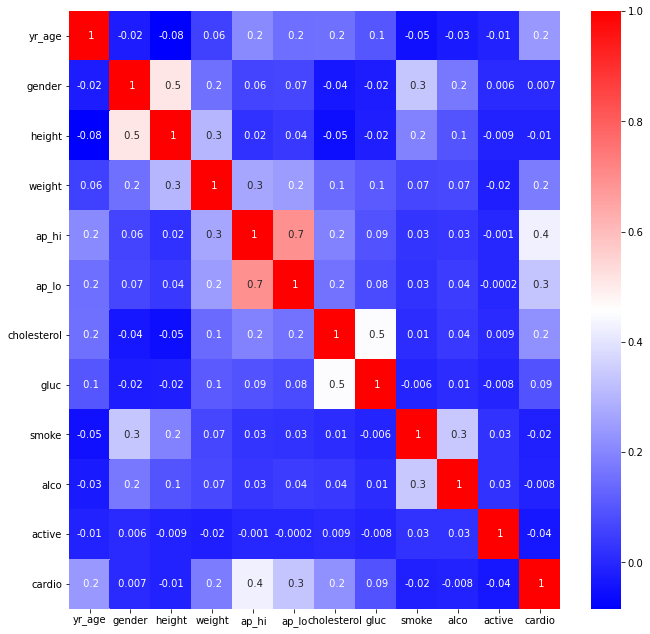

In [21]:
# Gráfico da correlação
plt.figure(figsize=(11,11))
ax = sns.heatmap(correlacao, annot=True, fmt=' .0g', cmap='bwr')
ax.set_ylim(12.0 ,0.0)

## Criação de modelos de machine learning

In [22]:
# Importando as bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [23]:
# Dividindo as colunas de input e a da classe
x = df.drop('cardio', axis=1)
y = df['cardio']

In [32]:
knn = KNeighborsClassifier()
valores = range(20, 41)
vizinhos = {'n_neighbors': valores}
gs_knn = GridSearchCV(knn, vizinhos, cv=2, scoring='accuracy', verbose= 1)

In [33]:
gs_knn.fit(x, y)

Fitting 2 folds for each of 21 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  7.6min finished


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(20, 41)}, scoring='accuracy',
             verbose=1)

In [34]:
print(f'Melhor resultado: {gs_knn.best_score_}')
print(f'Melhor parâmetro: {gs_knn.best_params_}')

Melhor resultado: 0.7197888491405636
Melhor parâmetro: {'n_neighbors': 37}


In [35]:
random = RandomForestClassifier()
valores = (120, 130, 140, 150, 160, 170)
estimator = {'n_estimators': valores}
gs_random = GridSearchCV(random, estimator, cv=2, scoring='accuracy', verbose=1)

In [36]:
gs_random.fit(x, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.3min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': (120, 130, 140, 150, 160, 170)},
             scoring='accuracy', verbose=1)

In [37]:
print(f'Melhor resultado: {gs_random.best_score_}')
print(f'Melhor parâmetro: {gs_random.best_params_}')

Melhor resultado: 0.7089840909751912
Melhor parâmetro: {'n_estimators': 170}


## Verificando os resultados do melhor modelo

In [39]:
# Separando os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [41]:
# Efetuando a validação cruzada
print(pd.crosstab(y_test, gs_knn.predict(x_test), margins=True))

col_0      0     1    All
cardio                   
0       6730  1873   8603
1       2806  5783   8589
All     9536  7656  17192


In [42]:
# Verificando as classificações do modelo
print(metrics.classification_report(y_test, gs_knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8603
           1       0.76      0.67      0.71      8589

    accuracy                           0.73     17192
   macro avg       0.73      0.73      0.73     17192
weighted avg       0.73      0.73      0.73     17192



## Comparando as classes existentes com as preditas

In [44]:
# Criando uma coluna com as predições
df['cardio_predict'] = gs_knn.predict(x)

In [45]:
df

,yr_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cardio_predict
0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


In [63]:
# criando uma variável com as vezes que o modelo acertou
right = len(df[df['cardio'] == df['cardio_predict']].index)

In [64]:
# criando uma variável com as vezes que o modelo errou
wrong = len(df[df['cardio'] != df['cardio_predict']].index)

In [65]:
# mostrando os valores das comparações
print(f'Vezes que o modelo acertou: {right}')
print(f'Vezes que o modelo errou: {wrong}')

Vezes que o modelo acertou: 50302
Vezes que o modelo errou: 18464
